# Resources Used:

In [1]:
# https://youtu.be/eHd8JsJQ6AA?si=dYxvwx4tEFtUxSPj
# https://www.geeksforgeeks.org/gaussian-naive-bayes-using-sklearn/
# https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
# https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
# https://stackoverflow.com/questions/67744245/how-to-create-a-knn-function-without-a-library
# https://youtu.be/4HKqjENq9OU?si=UWaxMsHHCKEG5dNj
# https://www.geeksforgeeks.org/k-nearest-neighbours/
# https://youtu.be/CRW-OM4AlNs?si=dHp-8y-hr-_vcOx1
# ChatGPT for TypeErrors, Attribute Errors, and Creating the Print Statements

# Implementing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Data Pre-processing

In [3]:
# Load dataset from CSV
dataset = pd.read_csv("dataset.csv", header=None)

# Normalizing each face image vector to unit length
normalized_dataset = dataset.apply(lambda x: x / np.linalg.norm(x), axis=1)

# Split dataset into training and testing sets for each subject
subjects = 10
images_per_subject = 170
training_images_per_subject = 150
testing_images_per_subject = images_per_subject - training_images_per_subject

# Initialize lists to store training and testing data
train_data = []
test_data = []

# Iterate over subjects
for subject in range(subjects):
    # Get indices for the current subject
    start_index = subject * images_per_subject
    end_index = start_index + images_per_subject

    # Extract data for the current subject
    subject_data = normalized_dataset.iloc[start_index:end_index]

    # Randomly select 150 images for training and 20 for testing
    train_indices, test_indices = train_test_split(subject_data.index, train_size=training_images_per_subject, test_size=testing_images_per_subject, random_state=42)

    # Append training data
    train_data.append(normalized_dataset.iloc[train_indices])

    # Append testing data
    test_data.append(normalized_dataset.iloc[test_indices])

# Concatenate training and testing data for all subjects
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (1500, 1024)
Testing data shape: (200, 1024)


# K-Nearest Neighbour Function (No Libraries Used)

In [4]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def k_nearest_neighbors(train_data, test_data, k, distance_metric):
    # Initialize list to store predictions
    predictions = []

    # Iterate over each test image
    for test_index, test_image in test_data.iterrows():
        # Initialize list to store distances between test image and each training image
        distances = []

        # Iterate over each training image
        for train_index, train_image in train_data.iterrows():
            # Calculate distance based on the selected distance metric
            if distance_metric == 'euclidean':
                distance = euclidean_distance(test_image, train_image)
            elif distance_metric == 'cosine':
                distance = cosine_similarity(test_image, train_image)
            else:
                raise ValueError("Invalid distance metric")

            # Append distance to list
            distances.append((train_index, distance))

        # Sort distances in ascending order
        distances.sort(key=lambda x: x[1])

        # Get indices of k-nearest neighbors
        neighbors = [index for index, _ in distances[:k]]

        # Get labels of k-nearest neighbors
        labels = [index // images_per_subject for index in neighbors]

        # Predict the label of the test image
        prediction = max(set(labels), key=labels.count)

        # Append prediction to list
        predictions.append(prediction)

    return predictions

k_values = [2, 5, 7, 11]

# Find the accuracy of the K-Nearest Neighbors algorithm
def accuracy(predictions, test_data):
    correct = 0

    for prediction, (_, label) in zip(predictions, test_data.iterrows()):
        if prediction == label.name // images_per_subject:
            correct += 1

    return correct / len(test_data)

for k in k_values:
    print(f"K = {k}")
    print("Euclidean Distance:")
    accuracy_euclidean = accuracy(k_nearest_neighbors(train_data, test_data, k, 'euclidean'), test_data)
    print(f"Accuracy: {accuracy_euclidean:.2f}")
    print("Cosine Similarity:")
    accuracy_cosine = accuracy(k_nearest_neighbors(train_data, test_data, k, 'cosine'), test_data)
    print(f"Accuracy: {accuracy_cosine:.2f}")
    print()

K = 2
Euclidean Distance:
Accuracy: 0.97
Cosine Similarity:
Accuracy: 0.05

K = 5
Euclidean Distance:
Accuracy: 0.98
Cosine Similarity:
Accuracy: 0.03

K = 7
Euclidean Distance:
Accuracy: 0.96
Cosine Similarity:
Accuracy: 0.04

K = 11
Euclidean Distance:
Accuracy: 0.94
Cosine Similarity:
Accuracy: 0.05



# SVM Function + GaussianNB (Using Sklearn Library)

In [5]:
def support_vector_machine(train_data, test_data):
    # Initialize Support Vector Machine classifier
    classifier = svm.SVC()

    # Train the classifier
    classifier.fit(train_data, [index // images_per_subject for index, _ in train_data.iterrows()])

    # Predict the labels of the test data
    predictions = classifier.predict(test_data)

    return predictions

def gaussian_naive_bayes(train_data, test_data):
    # Initialize Gaussian Naive Bayes classifier
    classifier = GaussianNB()

    # Train the classifier
    classifier.fit(train_data, [index // images_per_subject for index, _ in train_data.iterrows()])

    # Predict the labels of the test data
    predictions = classifier.predict(test_data)

    return predictions

print("Support Vector Machine:")
accuracy_svm = accuracy(support_vector_machine(train_data, test_data), test_data)
print(f"Accuracy: {accuracy_svm:.2f}")

print("Gaussian Naive Bayes:")
accuracy_gnb = accuracy(gaussian_naive_bayes(train_data, test_data), test_data)
print(f"Accuracy: {accuracy_gnb:.2f}")

Support Vector Machine:
Accuracy: 1.00
Gaussian Naive Bayes:
Accuracy: 0.85


# Comparing Accuracy

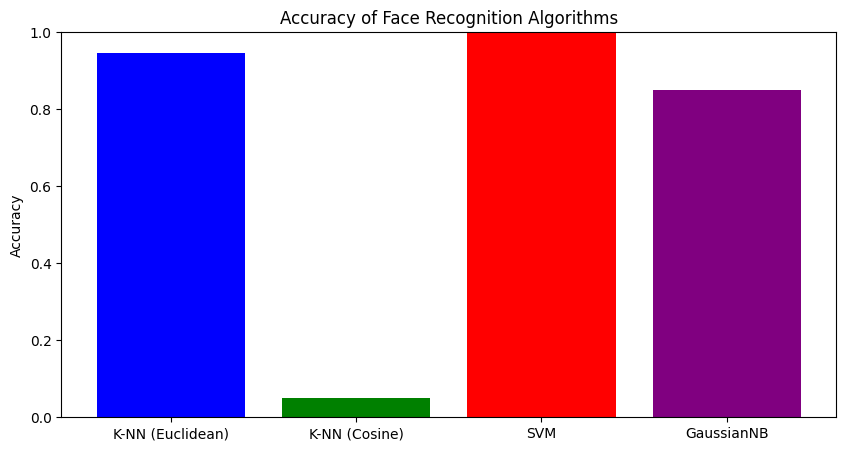

In [6]:
# Plotting the accuracies of the K-Nearest Neighbors, Support Vector Machine, and Gaussian Naive Bayes algorithms
accuracies = [accuracy_euclidean, accuracy_cosine, accuracy_svm, accuracy_gnb]
labels = ['K-NN (Euclidean)', 'K-NN (Cosine)', 'SVM', 'GaussianNB']

plt.figure(figsize=(10, 5))
plt.bar(labels, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Face Recognition Algorithms')
plt.ylim(0, 1)
plt.show()

# Principal Component Analysis

Training data shape after PCA: (1500, 100)
Testing data shape after PCA: (200, 100)


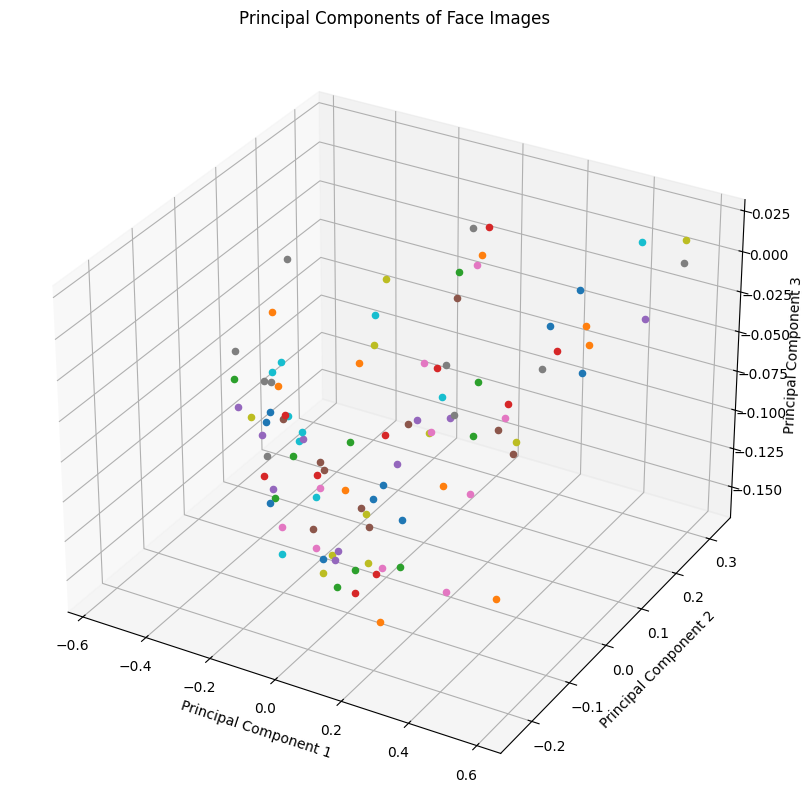

In [8]:
# Initialize PCA with 100 components
pca = PCA(n_components=100)

# Fit PCA on training data
pca.fit(train_data)

# Create training and testing data with 100 principal components
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

# Transform training and testing data
train_data_pca = pd.DataFrame(train_data_pca)
test_data_pca = pd.DataFrame(test_data_pca)

print("Training data shape after PCA:", train_data_pca.shape)
print("Testing data shape after PCA:", test_data_pca.shape)

# Initialize 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the first 100 training images in 3D space
for index, image in train_data_pca[:100].iterrows():
    ax.scatter(image[0], image[1], image[2])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Principal Components of Face Images')
plt.show()